# **Identify Market Opportunities at Rusty Bargain Automotive Commerce Company**

# Project Goals

Rusty Bargain is a used car buy and sell company that is developing an app to attract new customers. In the application, you can quickly find out the market value of your car. You have access to historical data, vehicle technical specifications, vehicle model versions and vehicle prices. Our task is to create a model that determines the market value of the car.

Rusty Bargain interested in:

- the prediction quality
- the speed of prediction model
- the time required to train the model

- take a look at each columns and drop the unused columns
- check the missing values, for example missing values > 20% must be dropped
- correlation
- dimensionality reduction (PCA)

- Scaling Features:
  - Using ML algorithm (calculating distance)
  - We can use these algorithm to calculate the distance;
    - KNN
    - SVM
    - NN
    - KMeans
  - Train ML model using;
    - Decision Tree
    - Logistic Regression
    - LightGBM
    - Random Forest

MinMaxScaler / StandardScaler / MaxAbsScaler

# Inititalization

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)


#for importing files to google collab
from google.colab import files

In [4]:
#upload datasets
#uploaded = files.upload()

## **1. Data Preparation**

In [5]:
data = pd.read_csv('/content/car_data.csv')

In [6]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


<Axes: >

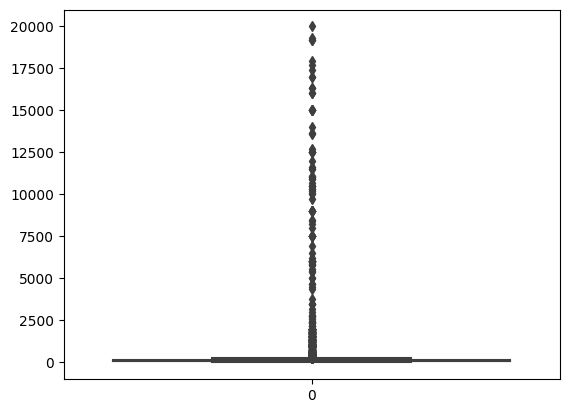

In [7]:
sns.boxplot(data['Power'])

In [8]:
data['Price'].value_counts() / data.shape[0] * 100

0        3.039769
500      1.600027
1500     1.522142
1000     1.311909
1200     1.296389
           ...   
1368     0.000282
233      0.000282
11080    0.000282
16340    0.000282
10985    0.000282
Name: Price, Length: 3731, dtype: float64

In [9]:
data.corr()['Price']

Price                1.000000
RegistrationYear     0.026916
Power                0.158872
Mileage             -0.333199
RegistrationMonth    0.110581
NumberOfPictures          NaN
PostalCode           0.076055
Name: Price, dtype: float64

In [10]:
data.shape

(354369, 16)

**Conclusion**

Based on the `car_data.csv` dataset. There are 354369 data rows and 16 columns. There is some outliers in the `'Power'` column, we will fix them later. And then, check the features that have a strong correlation with the `'Price'` column. Those that have no correlation will be dropped.

**Drop Unused Columns**

In [11]:
data = data.drop(['DateCrawled', 'DateCreated', 'PostalCode', 'LastSeen'], axis=1)

In [12]:
data.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,NumberOfPictures
0,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,0
1,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,0
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,0
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,0
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,0


**Conclusion**

Drop columns that are not needed or have no correlation with the `'Price'` column, the following are the columns that must be dropped:

- `'DateCrawled'`
- `'DateCreated'`
- `'PostalCode'`
- `'LastSeen'`

It has to be done, so we will have not too many features. Therefore, the analysis results will be more accurate.

**Drop Constant Columns**

In [13]:
data['NumberOfPictures'].value_counts()

0    354369
Name: NumberOfPictures, dtype: int64

In [14]:
data = data.drop(['NumberOfPictures'], axis=1)

**Conclusion**

Drop columns that have constant values or all have the same value. Based on the data that we checked earlier, we find that the column `'NumberOfPictures'` has a constant value. We do this because columns with constant values do not have data that can help us in carry out the analysis process.

**Drop Strange Data**

In [15]:
data['RegistrationYear'].describe()

count    354369.000000
mean       2004.234448
std          90.227958
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: RegistrationYear, dtype: float64

In [16]:
data = data[data['RegistrationYear'] < 2024]
data = data[data['RegistrationYear'] > 2000]
data = data[data['Power'] != 0].reset_index(drop=True)

In [17]:
data.shape

(206829, 11)

**Conclusion**

Drop columns that have odd or extreme values. Based on the data that we checked earlier, we found the `'RegistrationYear'` column which has extreme values could become outliers in our dataset. It can be seen that there is a value of 9999 at the maximum value. Of course, it does not make sense because the gap is very far from the IQR value.

After we drop the column, we check the amount of data that currently available to ensure the data has been updated. There are 206829 data rows and 11 columns.

**Handle Missing Values**

In [18]:
data.isnull().sum()

Price                    0
VehicleType          19414
RegistrationYear         0
Gearbox               3897
Power                    0
Model                 7100
Mileage                  0
RegistrationMonth        0
FuelType             13047
Brand                    0
NotRepaired          27212
dtype: int64

In [19]:
(data.isnull().sum() / data.shape[0] * 100).sort_values()

Price                 0.000000
RegistrationYear      0.000000
Power                 0.000000
Mileage               0.000000
RegistrationMonth     0.000000
Brand                 0.000000
Gearbox               1.884165
Model                 3.432787
FuelType              6.308110
VehicleType           9.386498
NotRepaired          13.156762
dtype: float64

In [20]:
data = data.fillna('unknown')

In [21]:
data.isnull().sum()

Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Mileage              0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
dtype: int64

**Conclusion**

Next step, we check the columns that have missing values. We found some missing values at columns as below:

- `'VehicleType'`
- `'Gearbox'`
- `'Model'`
- `'FuelType'`
- `'NotRepaired'`

The missing values are filled with `'unknown'` values, so it will not be counted as mean. And then, we check again to ensure the data is no longer has missing value.

**Encoding Features**

In [22]:
categorical_features = [
    'VehicleType',
    'Gearbox',
    'Model',
    'FuelType',
    'Brand',
    'NotRepaired',
]

In [23]:
for feature in categorical_features:
    print(f'features {feature} {len(data[feature].value_counts())}')

features VehicleType 9
features Gearbox 3
features Model 246
features FuelType 8
features Brand 40
features NotRepaired 3


In [24]:
data_ohe = data.drop(['Model', 'Brand'], axis=1)
data_ohe = pd.get_dummies(data_ohe)

In [25]:
data_ohe.shape

(206829, 28)

In [26]:
data_ohe.head()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,VehicleType_bus,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,VehicleType_unknown,VehicleType_wagon,Gearbox_auto,Gearbox_manual,Gearbox_unknown,FuelType_cng,FuelType_electric,FuelType_gasoline,FuelType_hybrid,FuelType_lpg,FuelType_other,FuelType_petrol,FuelType_unknown,NotRepaired_no,NotRepaired_unknown,NotRepaired_yes
0,18300,2011,190,125000,5,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,9800,2004,163,125000,8,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,1500,2001,75,150000,6,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
3,3600,2008,69,90000,7,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,2200,2004,109,150000,8,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0


In [27]:
from sklearn.model_selection import train_test_split

data_ohe_train_valid, data_ohe_test = train_test_split(data_ohe, test_size=0.15, random_state=12345)
data_ohe_train, data_ohe_valid = train_test_split(data_ohe_train_valid, test_size=0.25, random_state=54321)

print(data_ohe_train.shape)
print(data_ohe_valid.shape)
print(data_ohe_test.shape)

(131853, 28)
(43951, 28)
(31025, 28)


In [28]:
data_ohe.corr(method='spearman')['Price'].sort_values()

Mileage                   -0.357856
VehicleType_unknown       -0.252298
VehicleType_small         -0.244130
Gearbox_manual            -0.222709
NotRepaired_yes           -0.219697
NotRepaired_unknown       -0.176673
FuelType_unknown          -0.169453
FuelType_petrol           -0.140013
Gearbox_unknown           -0.083580
VehicleType_other         -0.016286
FuelType_lpg              -0.016240
FuelType_cng              -0.008564
FuelType_other            -0.004266
FuelType_electric          0.009594
FuelType_hybrid            0.025984
VehicleType_bus            0.039304
VehicleType_wagon          0.060886
RegistrationMonth          0.086114
VehicleType_coupe          0.096151
VehicleType_convertible    0.124538
VehicleType_sedan          0.129130
VehicleType_suv            0.176950
FuelType_gasoline          0.230988
Gearbox_auto               0.256892
NotRepaired_no             0.291170
RegistrationYear           0.438915
Power                      0.525341
Price                      1

**Conclusion**

In the Encoding Features, we create `categorical_features` using the following fields:

- `'VehicleType'`
- `'Gearbox'`
- `'Model'`
- `'FuelType'`
- `'NotRepaired'`

After checking the features in the above columns. We found that the `'Model'` and `'Brand'` columns have too many unique features, it will results in a great influence when we do OHE. Therefore, we drop both columns.

The next step, we try to do a sanity test on the cleaned data. Here are the results:

- in dataset `'data_ohe_train'`, we get 131853 rows, 28 columns
- in dataset `'data_ohe_valid'`, we get 43951 rows, 28 columns
- in dataset `'data_ohe_test'`, we get 31025 rows, 28 columns

Then, we check again to find features that have a strong correlation with `'Price'` column. Here are the top 5 features that have a strong correlation with `'Price'` column:

- `'Power'` has 0.525341
- `'RegistrationYear'` has 0.438915
- `'NotRepaired_no'` has 0.291170
- `'Gearbox_auto'` has 0.256892
- `'FuelType_gasoline'`has 0.230988

It can be seen that in the first rank the `'Power'` feature has the strongest correlation with the `'Price'` column.

## **2. Train The Model**

In [29]:
from sklearn.metrics import mean_squared_error

def rmse(target, prediction):
    return mean_squared_error(target, prediction)**0.5

In [30]:
features_train = data_ohe_train.drop(['Price'], axis=1)
target_train = data_ohe_train['Price']

features_valid = data_ohe_valid.drop(['Price'], axis=1)
target_valid = data_ohe_valid['Price']

features_test = data_ohe_test.drop(['Price'], axis=1)
target_test = data_ohe_test['Price']

**Linear Regression**

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
%%time

model = LinearRegression()
model.fit(features_train, target_train)

CPU times: user 306 ms, sys: 67.7 ms, total: 373 ms
Wall time: 301 ms


LinearRegression()

In [33]:
%%time

pred_train = model.predict(features_train)
pred_valid = model.predict(features_valid)
pred_test = model.predict(features_test)

print("Train RMSE:", rmse(target_train, pred_train).round(5))
print("Valid RMSE:", rmse(target_valid, pred_valid).round(5))
print("Test RMSE:", rmse(target_test, pred_test).round(5))

Train RMSE: 3122.71756
Valid RMSE: 3107.08173
Test RMSE: 3104.9996
CPU times: user 72.1 ms, sys: 80.6 ms, total: 153 ms
Wall time: 86.2 ms


**Conclusion**

We test using **LinearRegression**, it seems we don't have experienced an overfitting data, because the Train, Valid, and Test values doesn't has a wide gap.

**Decision Tree**

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
for depth in [1, 2, 4, 6, 8, None]:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(features_train, target_train)

    pred_train = model.predict(features_train)
    pred_valid = model.predict(features_valid)
    print("Depth:", depth)
    print("Train RMSE:", rmse(target_train, pred_train).round(5))
    print("Valid RMSE:", rmse(target_valid, pred_valid).round(5))

Depth: 1
Train RMSE: 4228.0715
Valid RMSE: 4236.05785
Depth: 2
Train RMSE: 3672.40154
Valid RMSE: 3668.40637
Depth: 4
Train RMSE: 2990.46244
Valid RMSE: 2996.03837
Depth: 6
Train RMSE: 2575.35099
Valid RMSE: 2584.37382
Depth: 8
Train RMSE: 2357.46216
Valid RMSE: 2399.77745
Depth: None
Train RMSE: 860.20808
Valid RMSE: 2570.8734


In [36]:
%%time

model = DecisionTreeRegressor(max_depth=8)
model.fit(features_train, target_train)

CPU times: user 519 ms, sys: 919 µs, total: 520 ms
Wall time: 525 ms


DecisionTreeRegressor(max_depth=8)

**Conclusion**

We test using **DecisionTreeRegressor**, the RMSE value is better than **LinearRegression** because the smaller the value, the better we have

**Random Forest**

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
for depth in [1, 2, 4, 6, 8, None]:
    model = RandomForestRegressor(max_depth=depth, n_estimators=100)
    model.fit(features_train, target_train)

    pred_train = model.predict(features_train)
    pred_valid = model.predict(features_valid)
    print("Depth:", depth)
    print("Train RMSE:", rmse(target_train, pred_train).round(5))
    print("Valid RMSE:", rmse(target_valid, pred_valid).round(5))

Depth: 1
Train RMSE: 4228.07168
Valid RMSE: 4236.05585
Depth: 2
Train RMSE: 3671.14217
Valid RMSE: 3667.24987
Depth: 4
Train RMSE: 2949.67808
Valid RMSE: 2954.09806
Depth: 6
Train RMSE: 2526.74566
Valid RMSE: 2534.58008
Depth: 8
Train RMSE: 2305.1297
Valid RMSE: 2342.75809
Depth: None
Train RMSE: 1071.73516
Valid RMSE: 2076.04094


In [39]:
%%time

model = RandomForestRegressor(n_estimators=100, max_depth=8)
model.fit(features_train, target_train)

CPU times: user 28.4 s, sys: 65 ms, total: 28.5 s
Wall time: 28.5 s


RandomForestRegressor(max_depth=8)

In [40]:
%%time

pred_train = model.predict(features_train)
pred_valid = model.predict(features_valid)
pred_test = model.predict(features_test)

print("Train RMSE:", rmse(target_train, pred_train).round(5))
print("Valid RMSE:", rmse(target_valid, pred_valid).round(5))
print("Test RMSE:", rmse(target_test, pred_test).round(5))

Train RMSE: 2305.34299
Valid RMSE: 2342.99351
Test RMSE: 2340.118
CPU times: user 1.79 s, sys: 6.66 ms, total: 1.8 s
Wall time: 1.81 s


**LGBM - Gradient Boosting**

In [41]:
import lightgbm as lgb

In [42]:
%%time

model = lgb.LGBMRegressor(num_iterations=20, verbose=0, metric='rmse')
model.fit(features_train,
          target_train,
          eval_set=(features_valid, target_valid))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's rmse: 4446.61
[2]	valid_0's rmse: 4163
[3]	valid_0's rmse: 3916.85
[4]	valid_0's rmse: 3696.55
[5]	valid_0's rmse: 3509.78
[6]	valid_0's rmse: 3343.06
[7]	valid_0's rmse: 3198.98
[8]	valid_0's rmse: 3074.64
[9]	valid_0's rmse: 2967.22
[10]	valid_0's rmse: 2874.61
[11]	valid_0's rmse: 2793.9
[12]	valid_0's rmse: 2723.73
[13]	valid_0's rmse: 2660.88
[14]	valid_0's rmse: 2607.48
[15]	valid_0's rmse: 2560.3
[16]	valid_0's rmse: 2518.09
[17]	valid_0's rmse: 2481.54
[18]	valid_0's rmse: 2447.05
[19]	valid_0's rmse: 2419.97
[20]	valid_0's rmse: 2394.84
CPU times: user 963 ms, sys: 14.6 ms, total: 977 ms
Wall time: 573 ms


LGBMRegressor(metric='rmse', num_iterations=20, verbose=0)

In [43]:
%%time

pred_train = model.predict(features_train)
pred_valid = model.predict(features_valid)
pred_test = model.predict(features_test)

print("Train RMSE:", rmse(target_train, pred_train).round(5))
print("Valid RMSE:", rmse(target_valid, pred_valid).round(5))
print("Test RMSE:", rmse(target_test, pred_test).round(5))

Train RMSE: 2382.51669
Valid RMSE: 2394.83998
Test RMSE: 2390.46661
CPU times: user 454 ms, sys: 4.03 ms, total: 458 ms
Wall time: 252 ms


**Conclusion**

We test using **RandomForest** the execution time is quite long, around 28.5 seconds. This is of course much slower than **DecisionTree** which only takes 525 milliseconds. For this case the best model is **DecisionTree**

## **3. Analyze The Model**

- The Fastest: **Decision Tree**, with a model train time of 525 ms

- The Best Model: **Random Forest** with the smallest results as follows;
   - Train RMSE: 2305.85291
   - Valid RMSE: 2342.15228
   - Test RMSE: 2340.56104

- Balance: **Random Forest** and **LGBM**, that has no a wide gap values

**Random Forest** with the following results;

     Train RMSE: 2305.85291
     Valid RMSE: 2342.15228
     Test RMSE: 2340.56104
    
**LGBM** with the following results;

     Train RMSE: 2382.51669
     Valid RMSE: 2394.83998
     Test RMSE: 2390.46661

# **4. Final Conclusion**

Based on the dataset we used `car_data.csv`. The `car_data.csv` dataset contains information for a used car buying and selling company "Rusty Bargain", this dataset has 16 columns and 354369 rows data. In this case, we perform an analysis using several machine learning models to help an automotive commerce company called "Rusty Bargain" find solutions to encounter their problems. After we check the dataset that has been given, then we analyze the data, for further checking to the columns that we actually use for the machine learning model. It has to be done to facilitate the company in determining the market value for the car.

Next, we perform a prediction with several models. Keep in mind that Rusty Bargain had interested in:
- the prediction quality
- the speed of prediction model
- the time required to train the model

Therefore, we use several types of predictive models, as follows;
- Linear Regression
- Decision Tree
- Random Forest
- LGBM

After we performed a training model using these models, we get the best results on the **Random Forest** model with the smallest results. However, the **LGBM** model also needs to be considered because the difference between the results and the Random Forest is quite small, and it only takes 1.44 seconds. So, in terms of results, it can be concluded that the Random Forest and LGBM results are similar.

It can be concluded that overall test has been completed.